In [3]:
import numpy as np
import scipy as sc
from scipy.sparse import dia_matrix, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve

In [4]:
from matplotlib import pyplot as plt

In [5]:
def boundary(x, y):
    return np.sin(np.pi*x)*np.cos(np.pi*y)

In [6]:
def function(x, y):
    return 2*np.pi**2*boundary(x, y)

In [62]:
def create_matrix(dx, dy, g, n, func):
    h = 1 / (n - 1)
    N_elem = (n - 2)**2
    #row_index = np.zeros(N_elem+1)
    #nnz = (n-4)**2 + 16*(n - 4) + 12
    #col_index = np.zeros(nnz)
    #values = np.zeros(nnz)
    f = np.zeros(N_elem)
    col1 = -(dx) * np.ones(N_elem)
    col2 = -(dy) * np.ones(N_elem)
    col3 = (2*(dx + dy)) * np.ones(N_elem)
    col4 = -(dy) * np.ones(N_elem)
    col5 = -(dx) * np.ones(N_elem)
    for i in range(0, n-2):
        col2[i*(n-2) + n-3] = 0
        col4[i*(n-2) + n-3] = 0
    col4 = np.roll(col4, 1)
    offsets = np.array([-(n-2), -1, 0, 1,  (n-2)])
    data = [col1, col2, col3, col4,col5]
    A = csc_matrix(dia_matrix((data, offsets), shape=((n-2)**2, (n-2)**2)))
    for j in range(1, n-1):
        for i in range(1, n-1):
            temp = 0
            if i == 1:
                if j == 1:
                    temp = (dy*g((i)*h, (n - 1 - j + 1)*h)+dx*g((i-1)*h, (n - 1 - j)*h)) #/ h**2
                elif j == n - 2:
                    temp = (dy*g((i)*h, (n - 1 - j - 1)*h)+dx*g((i-1)*h, (n - 1 - j)*h)) #/ h**2
                else:
                    temp = dx*g((i-1)*h, (n - 1 - j)*h)  #/ h**2
            elif i == n - 2:
                if j == 1:
                    temp = (dy*g((i)*h, (n - 1 - j + 1)*h) + dx*g((i + 1)*h, (n - 1 - j)*h)) #/ h**2
                elif j == n-2:
                    temp = (dy*g((i)*h, (n - 1 - j - 1)*h) + dx*g((i + 1)*h, (n - 1 - j)*h)) #/ h**2
                else:
                    temp = dx*g((i-1)*h, (n - 1 - j)*h)  #/ h**2
            else:
                if j == 1:
                    temp = dy*g(i*h, 1) #/ h**2
                elif j == n-2:
                    temp = dy*g(i*h, 0) #/ h**2
            f[(j-1)*(n - 2) + (i - 1)] = (func(i*h, (n - 1 - j)*h)*h**2 + temp)
    return A, f

In [8]:
A_new, f_new = create_matrix(1, 1, boundary, 200, function)

h =  0.005025125628140704


In [11]:
#A_new.toarray()

In [12]:
f_new

array([-0.01579411, -0.03158428, -0.04736659, ...,  0.04736659,
        0.03158428,  0.01579411])

In [13]:
x_sol = spsolve(A_new, f_new)

In [14]:
x_sol

array([-0.01578438, -0.03156483, -0.04733741, ...,  0.05256806,
        0.03776618,  0.02200191])

In [15]:
max(x_sol)

0.9998830007791046

In [16]:
def check(g, sol, n):
    temp = 0
    h = 1 / (n - 1)
    for j in range(1, n-1):
        for i  in range(1, n-1):
            #print("g = ", g(i*h, (n - 1 - j)*h))
            #print(abs(g(i*h, (n - 1 - j)*h) - sol[(j-1)*(n - 2) + (i - 1)]))
            temp = max(temp, abs(g(i*h, (n - 1 - j)*h) - sol[(j-1)*(n - 2) + (i - 1)]))
    return temp

In [17]:
check(boundary, x_sol, 200)

0.029224850245392252

In [63]:
N_values = np.array([10*i for i in range(1, 11)])
c_norm = []
for val in N_values:
    A_new, f_new = create_matrix(1, 1, boundary, val, function)
    x_sol = spsolve(A_new, f_new)
    c_norm.append(check(boundary, x_sol, val))
    print(c_norm[-1])

0.20609770032253732
0.19138097498564582
0.1507478141484938
0.12201388525809401
0.10192627542996498
0.08747362308562168
0.07660831019227426
0.06806591315856306
0.06128613842234893
0.055710562073078125


In [64]:
h_values = 1 / (N_values - 1)

In [65]:
h_values = np.flip(h_values)

In [66]:
c_norm = np.flip(np.array(c_norm))

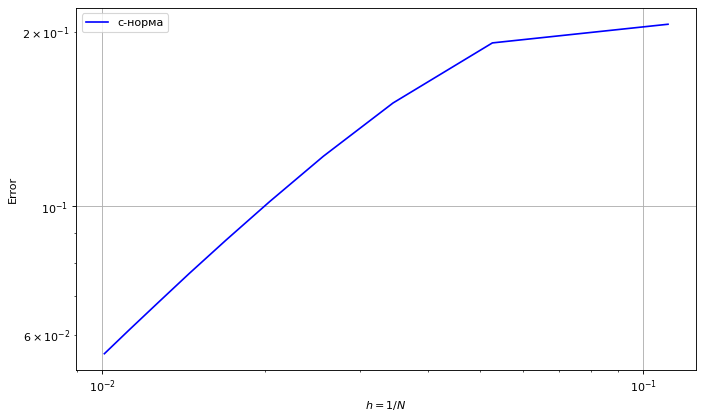

In [68]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xscale('log')
plt.yscale('log')
plt.plot(h_values, c_norm, color='blue', label='c-норма')
plt.xlabel("$h = 1/N$")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In [69]:
h_values

array([0.01010101, 0.01123596, 0.01265823, 0.01449275, 0.01694915,
       0.02040816, 0.02564103, 0.03448276, 0.05263158, 0.11111111])

In [70]:
c_norm

array([0.05571056, 0.06128614, 0.06806591, 0.07660831, 0.08747362,
       0.10192628, 0.12201389, 0.15074781, 0.19138097, 0.2060977 ])

In [ ]:

array([0.02      , 0.01      , 0.00666667, 0.005     , 0.004     ,
       0.00333333, 0.00285714, 0.0025    , 0.00222222, 0.002     ])

In [ ]:
[0.10192627542996498,
 0.055710562073078125,
 0.0383209452362315,
 0.029224850245392252,
 0.023629486084863496,
 0.019837806139304328,
 0.017098055968967005,
 0.01502528195534575,
 0.013402223569909777,
 0.012096729174412145]